# Results analisys

This Notebook has the intention to compares the metrics of a DRL Policy and a RB Policy applied both to a Building Control in EnergyPlus model.

## Importing the evaluation result files

First you need to import the files produced by `init_conventional.py` `init_evaluation.py`. The first is the RB Policy applied to the evaluation case, while the second one is the DRL Policy applied to the same scenario.

In [17]:
# Import the necesaty libraries
import pandas as pd

# Replace 'ppo_file_path' and 'rb_file_path' with the actual paths to your CSV files
drl_file_path = "C:/Users/grhen/Documents/ray_results/proposed_test/VN_P1_0.5_DQN.csv"
rb_file_path = "C:/Users/grhen/Documents/ray_results/conventional_test/VN_P1_0.5_RB.csv"

# Read CSV files into pandas DataFrames
drl_data = pd.read_csv(drl_file_path, header=None)
rb_data = pd.read_csv(rb_file_path, header=None)

# Function to clean and format the data
def clean_and_format(data: pd.DataFrame):
    # Remove empty rows
    data = data.dropna(how='all')

    # Add the specified header
    header = ["To", "Ti", "v", "d", "RHo", "RHi", "dh", "dc", "opening_window_1", "opening_window_2",
              'hora', 'simulation_day', 'volumen', 'window_area_relation_north',
              'window_area_relation_west', 'window_area_relation_south', 'window_area_relation_east',
              'construction_config', 'internal_mass', 'latitud', 'longitud', 'altitud', 'beta', 'E_max',
              "rad", "reward", "terminated", "truncated", 'energy', 'comfort', 'ppd']

    data.columns = header

    return data

# Apply cleaning and formatting to both DataFrames
drl_data_cleaned = clean_and_format(drl_data)
rb_data_cleaned = clean_and_format(rb_data)

# Now 'ppo_data_cleaned' and 'rb_data_cleaned' contain the cleaned and formatted data


You can analyse the general results obtained in both files with the `describe` method of pandas for DataFrame types.

In [18]:
# General results of the RB Policy
rb_data_cleaned.describe()

,To,Ti,v,d,RHo,RHi,dh,dc,opening_window_1,opening_window_2,...,latitud,longitud,altitud,beta,E_max,rad,reward,energy,comfort,ppd
count,52559.000000,52559.000000,52559.000000,52559.000000,52559.000000,52559.000000,52559.000000,52559.000000,52559.0,52559.000000,...,5.255900e+04,5.255900e+04,52559.0,52559.0,5.255900e+04,52559.000000,52559.000000,52559.000000,52559.000000,52559.000000
mean,15.700613,19.167473,4.277578,200.929007,54.465559,62.018091,119.861149,23.796573,0.0,0.105577,...,-3.298500e+01,-6.893000e+01,1043.0,0.5,4.166667e-01,230.135543,-0.364688,0.000040,-3.992899,72.928051
std,7.840545,3.556000,2.306554,96.529655,18.629588,19.609837,124.893032,81.272477,0.0,0.307298,...,7.105495e-15,4.263297e-14,0.0,0.0,1.110234e-16,328.916315,0.175132,0.000036,3.166302,35.024273
min,-4.400000,11.084014,0.100000,0.000000,16.000000,18.944846,0.000000,0.000000,0.0,0.000000,...,-3.298500e+01,-6.893000e+01,1043.0,0.5,4.166667e-01,0.000000,-0.500279,0.000000,-11.407125,5.000000
25%,9.933333,16.043321,2.533333,151.000000,39.000000,47.206831,0.000000,0.000000,0.0,0.000000,...,-3.298500e+01,-6.893000e+01,1043.0,0.5,4.166667e-01,0.000000,-0.500000,0.000000,-6.951457,44.477103
50%,15.800000,19.274555,4.000000,211.833333,54.000000,58.871579,0.000000,0.000000,0.0,0.000000,...,-3.298500e+01,-6.893000e+01,1043.0,0.5,4.166667e-01,0.000000,-0.479649,0.000069,-2.639663,95.913498
75%,21.300000,22.088465,5.700000,262.000000,68.666667,75.294138,250.000000,0.000000,0.0,0.000000,...,-3.298500e+01,-6.893000e+01,1043.0,0.5,4.166667e-01,466.000000,-0.222390,0.000069,-1.380532,100.000000
max,37.700000,27.791709,14.800000,359.833333,100.000000,100.000000,250.000000,927.666224,0.0,1.000000,...,-3.298500e+01,-6.893000e+01,1043.0,0.5,4.166667e-01,1092.000000,-0.025000,0.000258,0.618122,100.000000


In [19]:
# General results of the DRL Policy
drl_data_cleaned.describe()

,To,Ti,v,d,RHo,RHi,dh,dc,opening_window_1,opening_window_2,...,latitud,longitud,altitud,beta,E_max,rad,reward,energy,comfort,ppd
count,52559.000000,52559.000000,52559.000000,52559.000000,52559.000000,52559.000000,52559.000000,52559.000000,52559.000000,52559.000000,...,5.255900e+04,5.255900e+04,52559.0,52559.0,5.255900e+04,52559.000000,52559.000000,52559.000000,52559.000000,52559.000000
mean,15.700613,17.375388,4.277578,200.929007,54.465559,47.542731,147.085157,32.044423,0.492076,0.492190,...,-3.298500e+01,-6.893000e+01,1043.0,0.5,4.166667e-01,230.135543,-0.390662,0.000050,-4.822783,78.120423
std,7.840545,5.682051,2.306554,96.529655,18.629588,13.337479,121.759587,82.467337,0.499942,0.499944,...,7.105495e-15,4.263297e-14,0.0,0.0,1.110234e-16,328.916315,0.168416,0.000031,3.934272,33.681333
min,-4.400000,-0.954106,0.100000,0.000000,16.000000,15.283622,0.000000,0.000000,0.000000,0.000000,...,-3.298500e+01,-6.893000e+01,1043.0,0.5,4.166667e-01,0.000000,-0.500083,0.000000,-15.284199,5.000000
25%,9.933333,13.218231,2.533333,151.000000,39.000000,37.834647,0.000000,0.000000,0.000000,0.000000,...,-3.298500e+01,-6.893000e+01,1043.0,0.5,4.166667e-01,0.000000,-0.500083,0.000000,-8.379250,60.366725
50%,15.800000,17.455732,4.000000,211.833333,54.000000,46.189320,250.000000,0.000000,0.000000,0.000000,...,-3.298500e+01,-6.893000e+01,1043.0,0.5,4.166667e-01,0.000000,-0.499288,0.000069,-3.306763,99.840845
75%,21.300000,21.674985,5.700000,262.000000,68.666667,55.709514,250.000000,0.000000,1.000000,1.000000,...,-3.298500e+01,-6.893000e+01,1043.0,0.5,4.166667e-01,466.000000,-0.301864,0.000069,-1.672715,100.000000
max,37.700000,34.577337,14.800000,359.833333,100.000000,97.640962,250.000000,250.000000,1.000000,1.000000,...,-3.298500e+01,-6.893000e+01,1043.0,0.5,4.166667e-01,1092.000000,-0.025000,0.000069,2.047141,100.000000


## Graphs

Some metrics are better whe we can see how they change in time. In this part graphs are created to a more detailed view of the results.

In [20]:
import matplotlib.pyplot as plt

def line_plot(
    drl_data_cleaned: pd.DataFrame,
    rb_data_cleaned: pd.DataFrame,
    column_name:str
    ):
    """Plot a line chart

    Args:
        ppo_data_cleaned (pd.DataFrame): The metrics of the DRL Policy to be ploted.
        rb_data_cleaned (pd.DataFrame): The metrics of the RB Policy to be ploted.
        column_name (str): The ID name of the column in the DataFrames evaluated.
    """
    # Plotting PPO results
    plt.plot(drl_data_cleaned[column_name], label='DRL')

    # Plotting RB results
    plt.plot(rb_data_cleaned[column_name], label='RB')

    # Adding labels and title
    plt.xlabel('Time Steps')
    plt.ylabel(column_name)
    plt.title(f'Comparison of {column_name} between DRL and RB policies')
    plt.legend()

    # Display the plot
    plt.show()


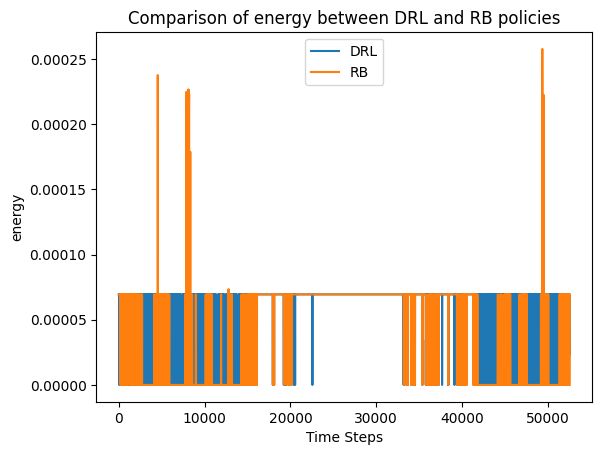

In [21]:
# Replace 'column_name' with the name of the column you want to plot
column_name = 'energy'

line_plot(
    drl_data_cleaned=drl_data_cleaned,
    rb_data_cleaned=rb_data_cleaned,
    column_name=column_name
    )

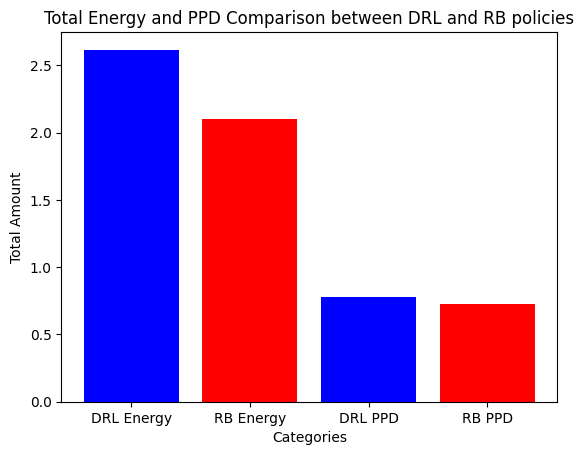

In [22]:
# Define the columns representing 'energy' and 'comfort'
energy_column = 'energy'
ppd_column = 'ppd'

# Calculate total energy and comfort for each DataFrame
drl_total_energy = drl_data_cleaned[energy_column].sum()
drl_total_ppd = drl_data_cleaned[ppd_column].mean()/100

rb_total_energy = rb_data_cleaned[energy_column].sum()
rb_total_ppd = rb_data_cleaned[ppd_column].mean()/100

# Create a bar graph
categories = ['DRL Energy', 'RB Energy', 'DRL PPD', 'RB PPD']
values = [drl_total_energy, rb_total_energy, drl_total_ppd, rb_total_ppd]

plt.bar(categories, values, color=['blue', 'red', 'blue', 'red'])
plt.xlabel('Categories')
plt.ylabel('Total Amount')
plt.title('Total Energy and PPD Comparison between DRL and RB policies')
plt.show()

In [23]:
drl_energy_rate_increment = (drl_total_energy-rb_total_energy)/rb_total_energy
drl_comfort_rate_increment = (drl_total_ppd-rb_total_ppd)/rb_total_ppd

print('The Energy Rate Increment of DRL Policy is: ' + str(round(drl_energy_rate_increment*100, 2))+'%\n')
print('The PPD Rate Increment of DRL Policy is: ' + str(round(drl_comfort_rate_increment*100, 2))+'%')

The Energy Rate Increment of DRL Policy is: 24.69%

The PPD Rate Increment of DRL Policy is: 7.12%
